# Level 1

### Task 1: Data Exploration and Preprocessing
- Explore the dataset and identify the number of rows and columns.
- Check for missing values in each column and handle them accordingly.
- Perform data type conversion if necessary. Analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances.

### Task 2: Task: Descriptive Analysis
- Calculate basic statistical measures (mean, median, standard deviation, etc.) for numerical columns.
- Explore the distribution of categorical variables like "Country Code" , "City" and "Cuisines".
- Identify the top cuisines and cities with the highest number of restaurants.

### Task 3: Geospatial Analysis
- Visualize the locations of restaurants on a map using latitude and longitude information.
- Analyze the distribution of restaurants across different cities or countries.
- Determine if there is any correlation between the restaurant's location and its rating.

# LEVEL 2

### Task 1: Table Booking and Online Delivery
- Determine the percentage of restaurants that offer table booking and online delivery.
- Compare the average ratings of restaurants with table booking and those without.
- Analyze the availability of online delivery among restaurants with different price ranges.

### Task 2: Price Range Analysis
- Determine the most common price range among all the restaurants.
- Calculate the average rating for each price range.
- Identify the color that represents the highest average rating among different price ranges.

### Task 3: Feature Engineering
- Extract additional features from the existing columns, such as the length of the restaurant name or address.
- Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

# LEVEL 3

### Task 1: Predictive Modeling
- Build a regression model to predict the aggregate rating of a restaurant based on available features.
- Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.
- Experiment with different algorithms (e.g. linear regression, decision trees, random forest) and compare their performance

### Task 2: Customer Preference Analysis
- Analyze the relationship between the type of cuisine and the restaurant's rating.
- Identify the most popular cuisines among customers based on the number of votes.
- Determine if there are any specific cuisines that tend to receive higher ratings.

### Task 3: Data Visualization
- Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc).
- Compare the average ratings of different cuisines or cities using appropriate visualizations.
- Visualize the relationship between various features and the target variable to gain insights.

In [1]:
# Necessory libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('restorant.csv')

In [8]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# LEVEL 1 : Task 1 : Data Exploration and Preprocessing

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [11]:
data.shape

(9551, 21)

## Checking for messing values

In [12]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

- There are 9 messing values in 'Cuisines' column
- They are very small so we will just drop them or replace "Not specified"

In [14]:
data['Cuisines'].isnull().sum()

9

In [18]:
data['Cuisines'].fillna("not specified" , inplace=True)

In [19]:
data['Cuisines'].isnull().sum()

0

In [20]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

 So it don't have any null value now

##  Now checking for duplicates

In [27]:
data.duplicated().sum()

0

So it don't have duplicate values

### Perform data type conversion if necessary. Analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

So don't have to do type conversion

### Analyzing Aggregate rating

In [29]:
data['Aggregate rating']

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9551, dtype: float64

In [32]:
data['Aggregate rating'].describe()  # Descriptive stats

count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

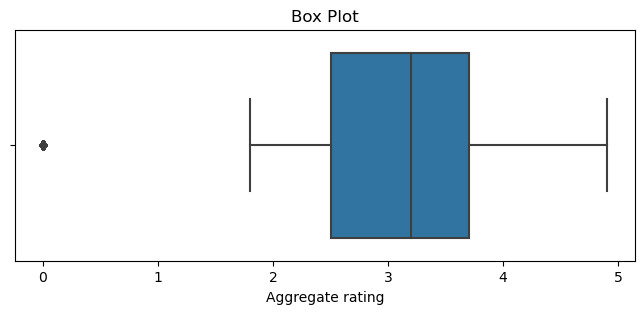

In [39]:
# Plot
plt.figure(figsize=(8,3))
sns.boxplot(x=data['Aggregate rating'])
plt.title('Box Plot')
plt.xlabel('Aggregate rating')
plt.show()

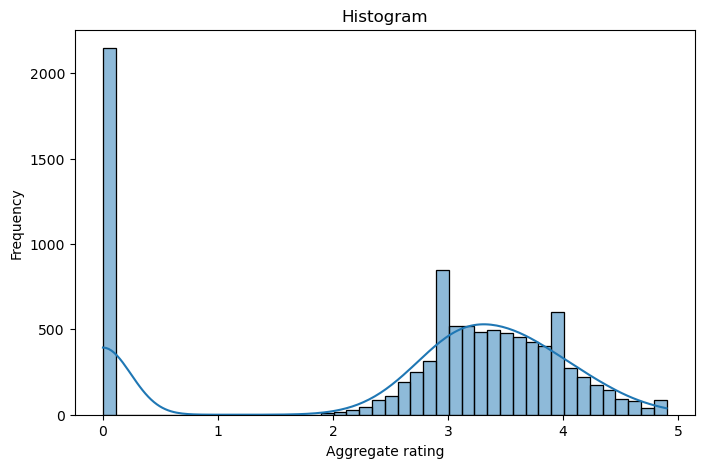

In [41]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(data['Aggregate rating'] , kde=True)
plt.title("Histogram")
plt.xlabel('Aggregate rating')
plt.ylabel("Frequency")
plt.show()

## LEVEL 1 : Task 2 : Descriptive Analysis

- Calculate basic statistical measures (mean, median, standard deviation, etc.) for numerical columns

In [42]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [44]:
data[['Average Cost for two' , 'Price range' , 'Aggregate rating' , 'Votes']].describe()

,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000
mean,1199.210763,1.804837,2.666370,156.909748
std,16121.183073,0.905609,1.516378,430.169145
min,0.000000,1.000000,0.000000,0.000000
25%,250.000000,1.000000,2.500000,5.000000
50%,400.000000,2.000000,3.200000,31.000000
75%,700.000000,2.000000,3.700000,131.000000
max,800000.000000,4.000000,4.900000,10934.000000


- Explore the distribution of categorical variables like "Country Code" , "City" and "Cuisines". Identify the top cuisines and cities with the highest number of restaurants.

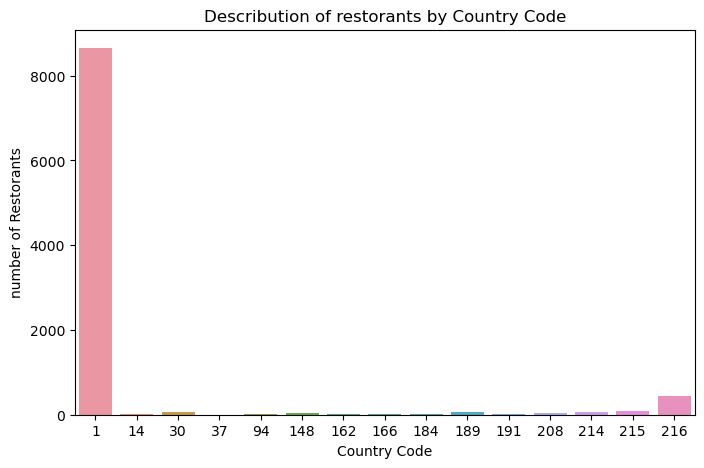

In [46]:
# the destribution of country code
plt.figure(figsize=(8,5))
sns.countplot(x='Country Code' , data=data)
plt.title("Describution of restorants by Country Code")
plt.xlabel('Country Code')
plt.ylabel("number of Restorants")
plt.show()

More restorants are located in country code:1 followed by 216

In [49]:
data['Country Code'].value_counts().head()

Country Code
1      8652
216     434
215      80
30       60
214      60
Name: count, dtype: int64

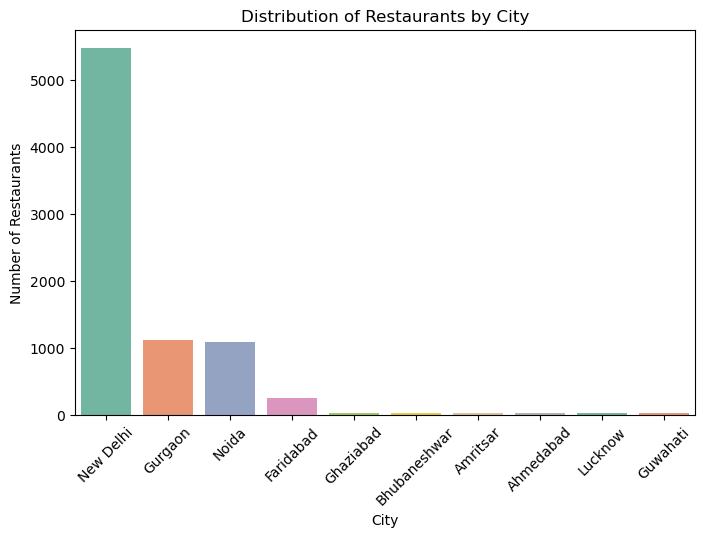

In [57]:
# the destribution of city

plt.figure(figsize=(8,5))
order = data['City'].value_counts().head(10).index  # Fixing the 'order' parameter
sns.countplot(x='City', data=data, order=order, palette='Set2')
plt.title("Distribution of Restaurants by City")  # Fix spelling
plt.xlabel("City")
plt.ylabel("Number of Restaurants")  # Fix spelling
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility (optional)
plt.show()

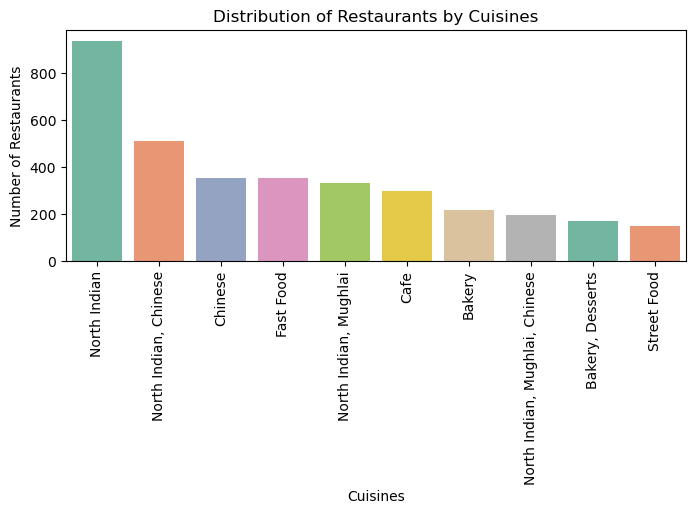

In [63]:
# the destribution of Cuisines

plt.figure(figsize=(8,3))
order = data['Cuisines'].value_counts().head(10).index  # Fixing the 'order' parameter
sns.countplot(x='Cuisines', data=data, order=order, palette='Set2')
plt.title("Distribution of Restaurants by Cuisines")  # Fix spelling
plt.xlabel("Cuisines")
plt.ylabel("Number of Restaurants")  # Fix spelling
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility (optional)
plt.show()

- Top Cuisines and Cities

In [64]:
data['City'].value_counts().head(10)

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64

In [65]:
data['Cuisines'].value_counts().head(10)

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

## LEVEL 1 : Task 3 : Geospatial Analysis

- Visualize the locations of restaurants on a map using latitude and longitude information

In [67]:
pip install shapely

  Obtaining dependency information for shapely from https://files.pythonhosted.org/packages/27/57/8ec7c62012bed06731f7ee979da7f207bbc4b27feed5f36680b6a70df54f/shapely-2.0.7-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 217.9 kB/s eta 0:00:07
   - -------------------------------------- 0.0/1.4 MB 245.8 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.4 MB 416.7 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.4 MB 467.6 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 532.5 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.4 MB 687.0 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 686.8 kB/s eta 0:00:02
   -------- ---------------------------

In [72]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [73]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [86]:
pip install geodatasets


  Obtaining dependency information for geodatasets from https://files.pythonhosted.org/packages/9d/dd/e30e144271280d263c0c10f34fbcf2e09e9a82bd11a165c5f1f498899a29/geodatasets-2024.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for pooch from https://files.pythonhosted.org/packages/a8/87/77cc11c7a9ea9fd05503def69e3d18605852cd0d4b0d3b8f15bbeb3ef1d1/pooch-1.8.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/64.6 kB ? eta -:--:--
   ------ --------------------------------- 10.2/64.6 kB ? eta -:--:--
   ------------------------- -------------- 41.0/64.6 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 64.6/64.6 kB 687.8 kB/s eta 0:00:00


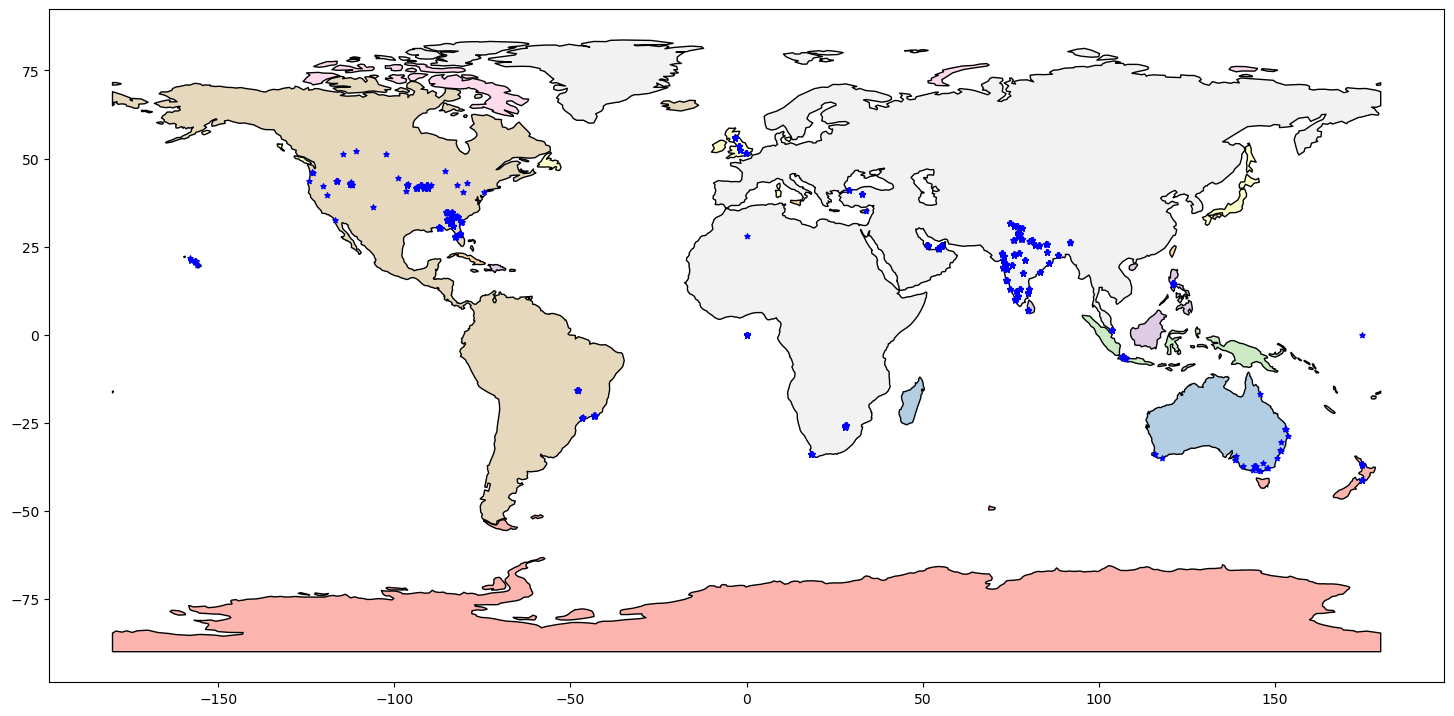

In [91]:
import geodatasets

# Load the Natural Earth low-res dataset
world = gpd.read_file(geodatasets.get_path("naturalearth.land"))

# Create a map
fig, ax = plt.subplots(figsize=(18, 15))
world.plot(ax=ax, cmap='Pastel1', edgecolor="black")

# Plot restaurant locations (assuming gdf contains valid points)
gdata.plot(ax=ax, marker='*', color='blue', markersize=15)

plt.show()

#### - Analyze the distribution of restaurants across different cities or countries. Determine if there is any correlation between the restaurant's location and its rating.

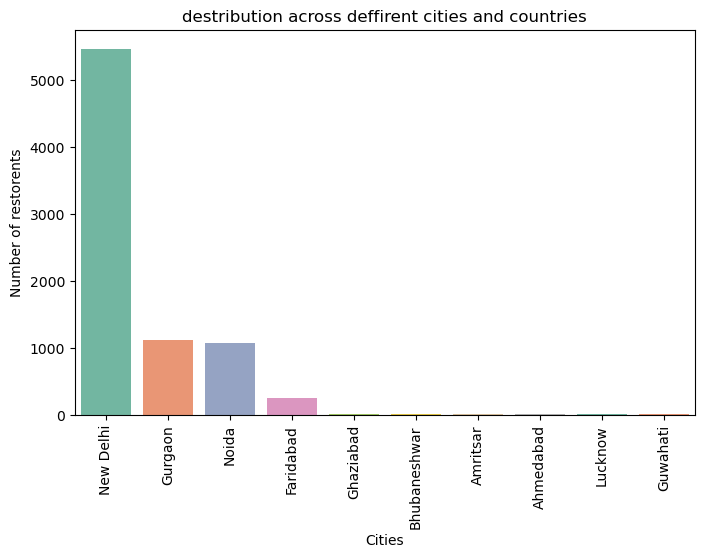

In [95]:
# destribution across deffirent cities and countries
plt.figure(figsize=(8 , 5))

order = data['City'].value_counts().head(10).index
sns.countplot(x='City', data=data, order=order, palette='Set2')
plt.title("destribution across deffirent cities and countries")
plt.xlabel("Cities")
plt.ylabel("Number of restorents")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility (optional)
plt.show()

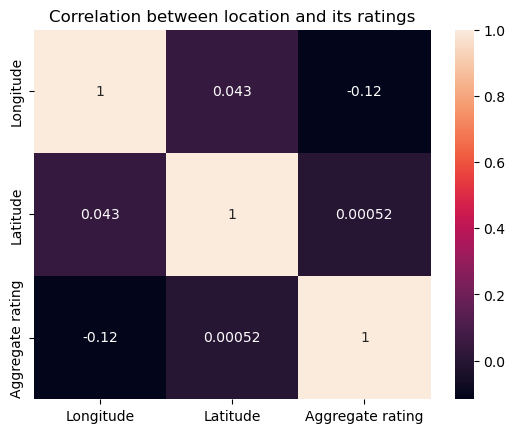

In [99]:
# Checking the Correlation between location and its ratings

corr = data[['Longitude' , 'Latitude' , 'Aggregate rating']].corr()
sns.heatmap(corr , annot=True)
plt.title("Correlation between location and its ratings")
plt.show()

In [103]:
# Correct path formatting (use raw string or double backslashes)
path = r"D:\Jupyter Notebook\internship\data.csv"  # Raw string (r"...")
# OR
# path = "D:\\Jupyter Notebook\\internship\\data.csv"  # Double backslashes

# Save DataFrame to CSV
data.to_csv(path, index=False)

# Correct formatted print statement
print(f"Successfully saved to {path}")  # f-string

Successfully saved to D:\Jupyter Notebook\internship\data.csv


## Observations
- In this Dataset, 9 missing values from the "Cuisines" Column. So, it can be replaced by Not Specified.
- In this Dataset, No Duplicates are present.
- After exploring the distribution of categorical variables like "Country Code," "City," and "Cuisines," I've found that the majority of restaurants are located in Country Code 1, followed by the second-highest concentration in Country Code 216. And 5473 Restaurants are located in Delhi, followed by 1118 in Gurgaon and 1080 in Noida.
- Top Cuisines are "North Indian," "Chinese," "Fast Food."
- USA and India have the most number of restaurants.